<a href="https://colab.research.google.com/github/luenna/github-slideshow/blob/main/making_a_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2

from tqdm import tqdm

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = 'drive/MyDrive/Colab_Notebooks/7x7'
categories = ["T2", "T2_LPS"]

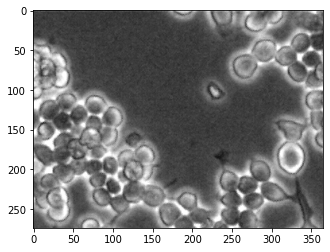

In [ ]:
for category in categories: 
  path = os.path.join(data_dir, category) #path to T2 or T2_LPS dir
  for img in os.listdir(path): #iterate over each image
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #convert to array
    plt.imshow(img_array, cmap = "gray") #graph it
    plt.show() #display
    break
  break 



In [ ]:
print(img_array)

[[135 134 142 ... 202 190 211]
 [104 101 116 ... 163 161 175]
 [ 91  84  75 ... 146 142 137]
 ...
 [ 91  94  94 ... 134 134 127]
 [ 87  91  92 ... 139 134 127]
 [ 92  87  97 ... 147 140 125]]


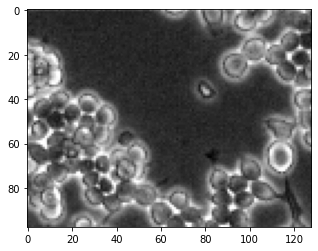

In [ ]:
new_array = cv2.resize(img_array, (128,98))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [ ]:
#create training dataset 
training_data = []

def create_training_data(): 
  for category in categories: 
    path = os.path.join(data_dir, category) #path to T2 or T2_LPS dir
    class_num = categories.index(category) #assigns numerical values 0 and 1 to T2- and +LPS
    for img in os.listdir(path):
      try: 
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        #resize (optional)
        #img_array = cv2.resize(img_array, (128,98))
        #plt.imshow(img_array, cmap = "gray")
        training_data.append([img_array, class_num])
      except Exception as e: 
        print("An Exception has occured.")

create_training_data()


In [ ]:
print(len(training_data)) #ggf daten balancen, sonst predictet er einfach das häufigere.

2009


In [ ]:
import random as rd 
rd.shuffle(training_data)


In [ ]:
# T2=0 oder T2_LPS=1 
for sample in training_data: 
  print(sample[1])

In [ ]:
x = []
y = []

In [ ]:
for features, label in training_data: 
  x.append(features)
  y.append(label)

#image size? 365 x 274
x = np.array(x).reshape(-1, 365, 274, 1)


In [ ]:
import pickle 
pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open('x.pickle', 'rb')
x = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [ ]:
y[3]

0

#CNN 

x.pickle befindet sich in /content hier in dem Ordner und sollte dann unpickled werden können. 


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle 


x = pickle.load(open('x.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))
y = np.array(y)

#daten normalisieren keras.utils.normalize 

x = x/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", 
              optimizer = "adam", 
              metrics = ['accuracy'])
model.fit(x, y, batch_size = 32, epochs = 10, validation_split = 0.2)





Epoch 1/10
51/51 [==============================] - 14s 264ms/step - loss: 0.7337 - accuracy: 0.5208 - val_loss: 0.6940 - val_accuracy: 0.5025
Epoch 2/10
51/51 [==============================] - 13s 255ms/step - loss: 0.6914 - accuracy: 0.5240 - val_loss: 0.6941 - val_accuracy: 0.5025
Epoch 3/10
51/51 [==============================] - 13s 255ms/step - loss: 0.6922 - accuracy: 0.5221 - val_loss: 0.6877 - val_accuracy: 0.5448
Epoch 4/10
51/51 [==============================] - 13s 255ms/step - loss: 0.6867 - accuracy: 0.5787 - val_loss: 0.6983 - val_accuracy: 0.5025
Epoch 5/10
51/51 [==============================] - 13s 254ms/step - loss: 0.6849 - accuracy: 0.5445 - val_loss: 0.6900 - val_accuracy: 0.5274
Epoch 6/10
51/51 [==============================] - 13s 254ms/step - loss: 0.6541 - accuracy: 0.6142 - val_loss: 0.6397 - val_accuracy: 0.6294
Epoch 7/10
51/51 [==============================] - 13s 253ms/step - loss: 0.6180 - accuracy: 0.6609 - val_loss: 0.7127 - val_accuracy: 0.5149